## This will be an analysis of a single company.
#### I will reproduce this for additional companies, for further analysis.

Just loading the packages.

In [1]:
import csv
import numpy as np
import math as ma
import pandas as pd
import plotly.express as px
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import chart_studio

from statsmodels.graphics.gofplots import qqplot

from scipy import stats
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

Loading the relevant CSV as dataframes.

In [2]:
main_df = pd.read_csv(r'Data/vg_complete_df.csv')
vg_comp_stock = pd.read_csv(r'Data/VG_Stocks.csv')

Filtering based on what I am looking for.

In [3]:
game_co = "Ubisoft"
vg_df = main_df[(main_df['company'] == "Ubisoft")]
stock = yf.Ticker('UBI.PA')

In [4]:

vg_df = vg_df[(vg_df['release_date_x'] > '1999-01-01')]
vg_df = vg_df[(vg_df['release_date_x'] < '2017-01-01')]



stock = stock.history(start= '1999-01-01', end = '2018-01-01')
stock.reset_index(inplace=True)

In [5]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 21 to 4430
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             464 non-null    object 
 1   console           464 non-null    object 
 2   genre_x           464 non-null    object 
 3   publisher         464 non-null    object 
 4   developer_x       464 non-null    object 
 5   critic_score      464 non-null    float64
 6   total_sales       464 non-null    float64
 7   release_date_x    464 non-null    object 
 8   NA_Sales          464 non-null    float64
 9   EU_Sales          464 non-null    float64
 10  JP_Sales          464 non-null    float64
 11  Other_Sales       464 non-null    float64
 12  Global_Sales      464 non-null    float64
 13  Critic_Count      457 non-null    float64
 14  User_Count        464 non-null    float64
 15  Rating            462 non-null    object 
 16  positive_critics  73 non-null     float64


A first look at the scores for genres. See if the company has any games that are significantly better than others. Though the numbers on this could be skewed because one game can come out on multiple platforms.

In [6]:
group = vg_df.groupby(['genre_x'])
group.agg(['mean', 'std', 'count'])['critic_score']

mean        std  count
genre_x                                      
Action            70.284314  14.321193    102
Action-Adventure  81.142857   7.094263     21
Adventure         68.421053  16.338698     38
Fighting          55.875000  21.033562      8
Misc              64.823529  10.791328     34
Music             74.000000   3.824265     17
Platform          74.000000  15.023214     34
Puzzle            79.000000   4.000000      3
Racing            61.343750  14.877152     32
Role-Playing      69.388889  13.903613     18
Shooter           72.098765  13.865970     81
Simulation        68.064516  16.204805     31
Sports            57.074074  14.456635     27
Strategy          69.111111  14.045677     18

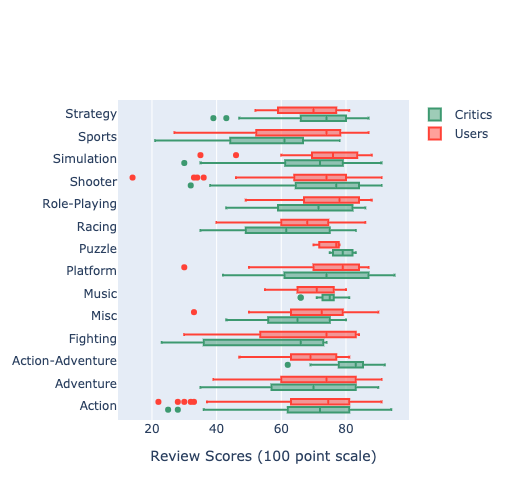

In [7]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=vg_df['critic_score'],
    y=vg_df['genre_x'],
    name='Critics',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    x=vg_df['user_score'],
    y=vg_df['genre_x'],
    name='Users',
    marker_color='#FF4136'
))

fig.update_layout(
    xaxis=dict(title='Review Scores (100 point scale)', zeroline=False),
    boxmode='group', height=500
)

fig.update_traces(orientation='h') # horizontal box plots
fig.show()

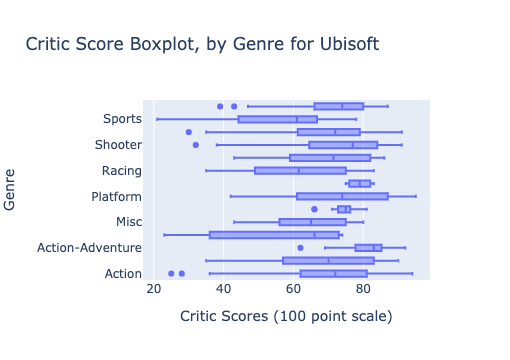

In [8]:
comp_crit = px.box(vg_df, y="genre_x", x="critic_score",
                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                     "genre_x": "Genre"
                 },
                title=(f"Critic Score Boxplot, by Genre for {game_co}"))
comp_crit.show()

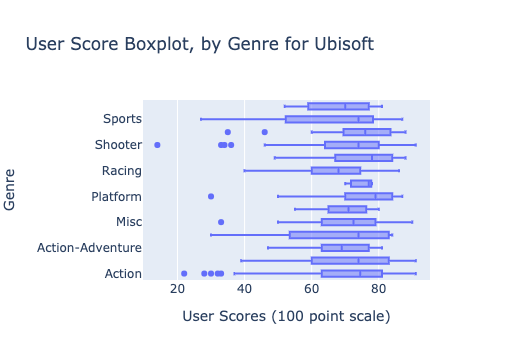

In [9]:
comp_crit = px.box(vg_df, y="genre_x", x="user_score",
                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                     "genre_x": "Genre"
                 },
                title=(f"User Score Boxplot, by Genre for {game_co}"))
comp_crit.show()

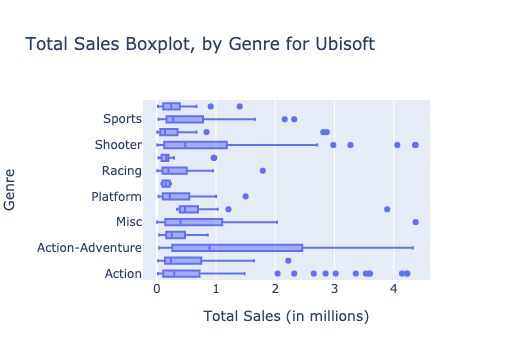

In [10]:
no_out_sales = vg_df[((vg_df.total_sales - vg_df.total_sales.mean()) / vg_df.total_sales.std()).abs() < 3]
comp_crit = px.box(no_out_sales, y="genre_x", x="total_sales",
                labels={
                    
                     "genre_x": "Genre",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"Total Sales Boxplot, by Genre for {game_co}"))
comp_crit.show()

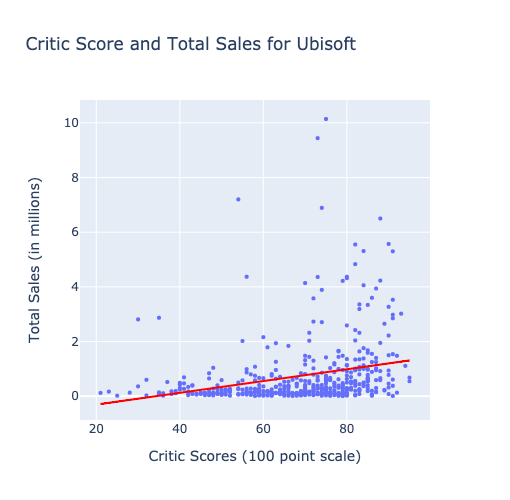

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     32.18
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           2.48e-08
Time:                        22:32:48   Log-Likelihood:                -746.09
No. Observations:                 464   AIC:                             1496.
Df Residuals:                     462   BIC:                             1504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7364      0.268     -2.744      0.0

In [11]:

fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 trendline="ols", trendline_color_override="red", height = 500,
                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"Critic Score and Total Sales for {game_co}")
)

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)

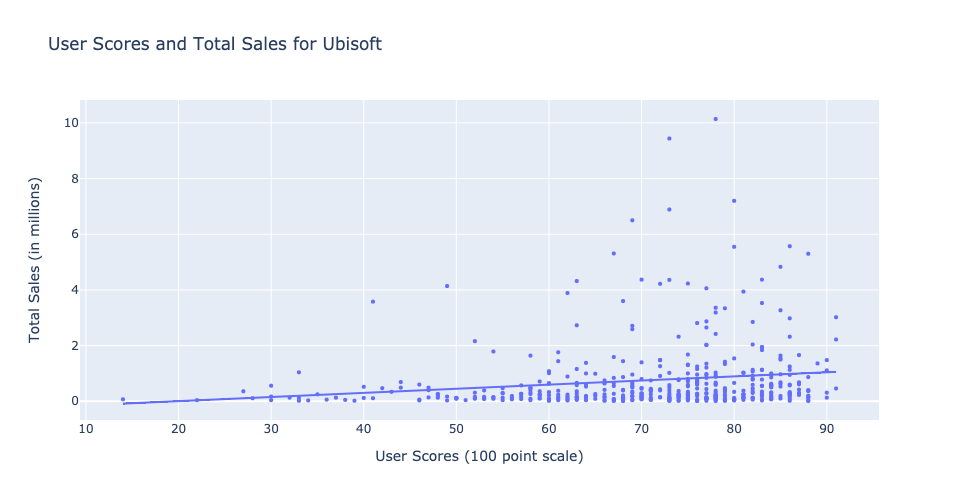

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     12.02
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           0.000574
Time:                        22:33:41   Log-Likelihood:                -755.75
No. Observations:                 464   AIC:                             1516.
Df Residuals:                     462   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2911      0.306     -0.951      0.3

In [12]:

fig = px.scatter(vg_df, x="user_score", y="total_sales", 
                 trendline="ols", height = 500,
                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales for {game_co}"))

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
result = results.iloc[0]["px_fit_results"].summary()
print(result)

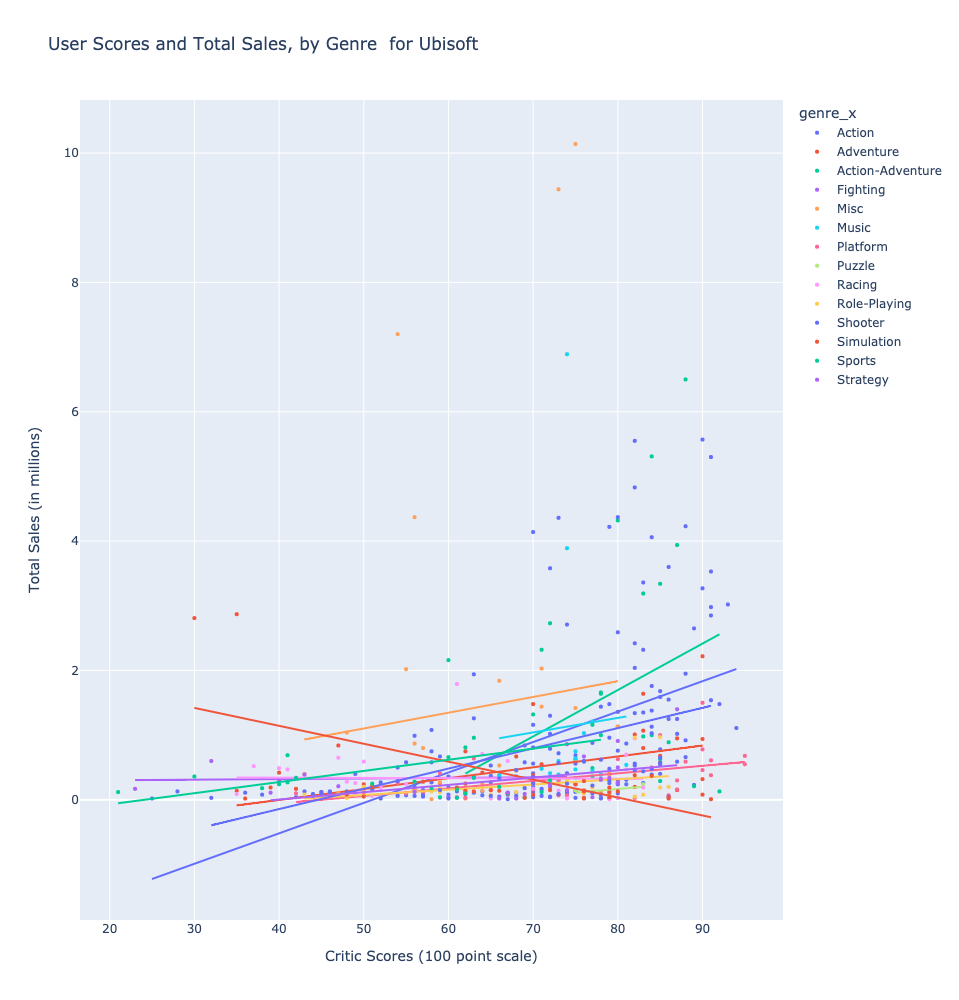

In [13]:

fig = px.scatter(vg_df, x="critic_score", y="total_sales", 
                 color="genre_x", trendline="ols", width= 1000, height = 1000,
                                labels={
                    
                     "critic_score": "Critic Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales, by Genre  for {game_co}"))


fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
#print(results)


In [14]:
for i in range(len(results)):
    print('_'*80)
    print('='*80 + '\n')
    print('\033[1m' + '#'* 5 + ' ' * 5 + results.iloc[i, 0] +  ' ' * 5 + '#'*5 + '\033[0m')
    result = results.iloc[i]["px_fit_results"].summary()
    print(result)

# #print(results.genre_x[1])

# # rest = results.reset_index()
# results.iloc[1, 0]

#len(results)

________________________________________________________________________________

#####     Action     #####
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     32.11
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           1.41e-07
Time:                        22:33:55   Log-Likelihood:                -161.90
No. Observations:                 102   AIC:                             327.8
Df Residuals:                     100   BIC:                             333.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



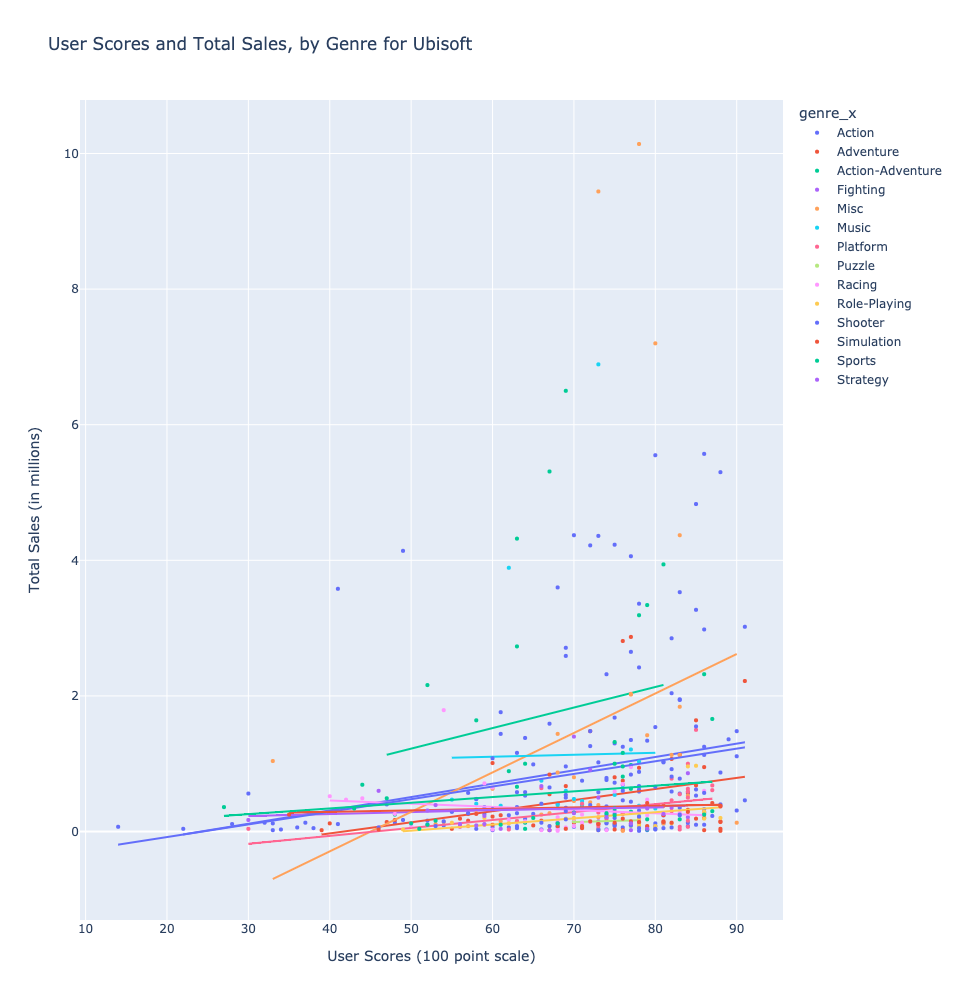

In [15]:

fig = px.scatter(vg_df, x="user_score", y="total_sales", 
                 color="genre_x", trendline="ols", height = 1000,
                                labels={
                    
                     "user_score": "User Scores (100 point scale)",
                    "total_sales": "Total Sales (in millions)"
                 },
                title=(f"User Scores and Total Sales, by Genre for {game_co}"))

fig.update_traces(marker=dict(size=4,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'
                             )
                 )

fig.show()

results = px.get_trendline_results(fig)
# print(results)


In [16]:
for i in range(len(results)):
    print('_'*80)
    print('='*80 + '\n')
    print('\033[1m' + '#'* 5 + ' ' * 5 + results.iloc[i, 0] +  ' ' * 5 + '#'*5 + '\033[0m')
    result = results.iloc[i]["px_fit_results"].summary()
    print(result)
    

________________________________________________________________________________

#####     Action     #####
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     5.125
Date:                Sun, 25 Jul 2021   Prob (F-statistic):             0.0257
Time:                        22:34:31   Log-Likelihood:                -173.55
No. Observations:                 102   AIC:                             351.1
Df Residuals:                     100   BIC:                             356.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=17

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 3 samples were given.

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18

/Users/backup/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=18



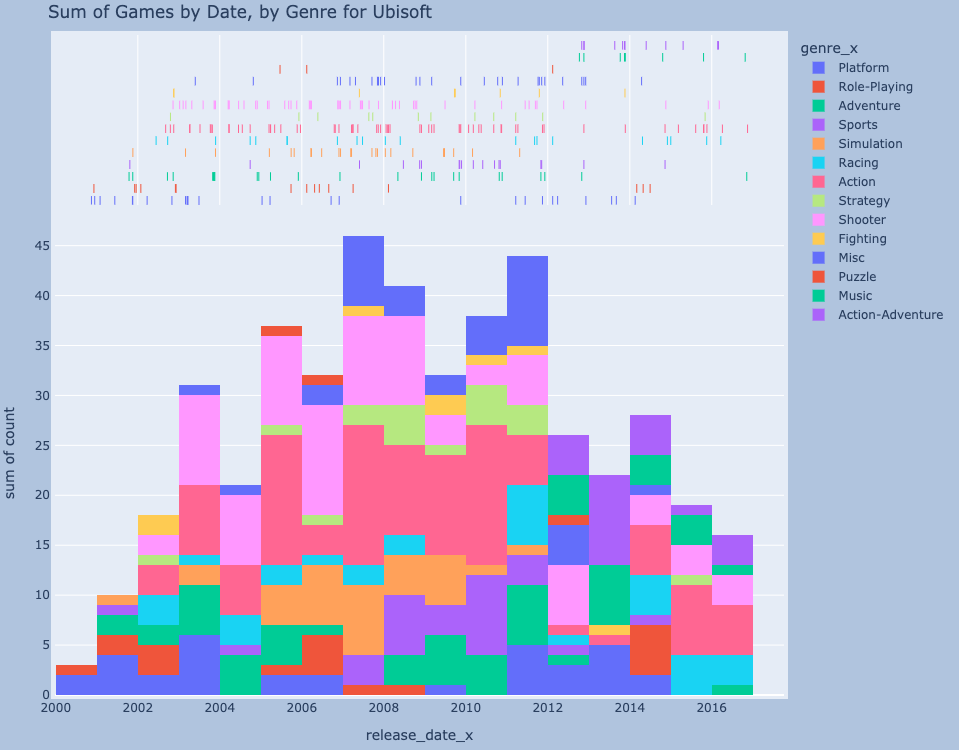

In [17]:
group_date_gen = vg_df.groupby(['release_date_x', 'genre_x'])
rls_dt_genre_ct = group_date_gen.agg(['count'])['title'].reset_index()



fig = px.histogram(rls_dt_genre_ct, x="release_date_x", y='count',
                   color="genre_x", marginal="rug", 
                   labels={
                   "release_data_x": "Date"
                 },
                title=(f"Sum of Games by Date, by Genre for {game_co}"))
fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=35,
        pad=4
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

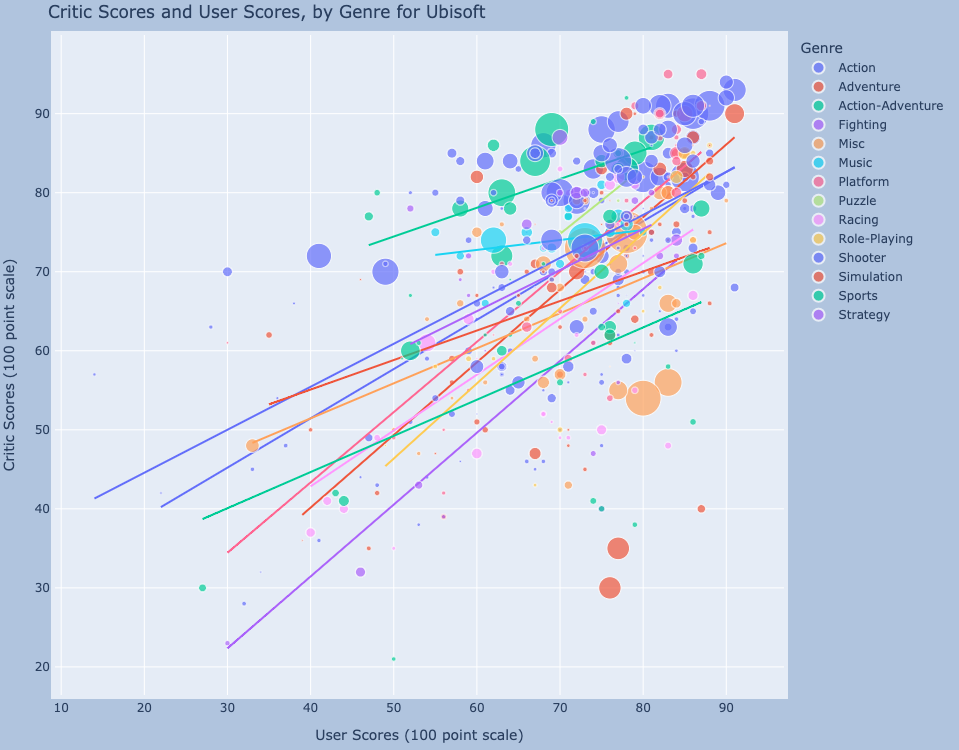

In [18]:
#fig = px.scatter(vg_df.query("total_sales > 1"),
fig = px.scatter(vg_df,                 
        x="user_score", y="critic_score",
        size="total_sales", color="genre_x",
        hover_name="title", log_x=False, trendline="ols", size_max=30,
    labels={
        "user_score": "User Scores (100 point scale)",               
        "critic_score": "Critic Scores (100 point scale)",
        "genre_x": "Genre"
    },    title=(f"Critic Scores and User Scores, by Genre for {game_co}"))

fig.update_layout(
    autosize=False,
    width=1000,
    height=750,
    margin=dict(
        l=35,
        r=10,
        b=30,
        t=35,
        pad=4
    ),

    paper_bgcolor="LightSteelBlue"
)


fig.show()

In [19]:
vg_df_series = vg_df.copy()

aggregation_functions = {'company' : 'first', 'stock' : 'first', 'console': lambda x: ', '.join(x), 
                        'genre_x': 'first',  
                        'critic_score': 'mean', 'total_sales': 'sum',
                        'user_score': 'mean'}
vg_df_series = vg_df_series.groupby(['title', 'release_date_x']).aggregate(aggregation_functions)
vg_df_series.reset_index(inplace=True)
vg_df_series

title release_date_x  company  stock  \
0                       187: Ride or Die     2005-08-23  Ubisoft  UBSFY   
1                       187: Ride or Die     2005-08-24  Ubisoft  UBSFY   
2           Academy of Champions: Soccer     2009-11-03  Ubisoft  UBSFY   
3      America's Army: Rise of a Soldier     2005-11-17  Ubisoft  UBSFY   
4          America's Army: True Soldiers     2007-11-15  Ubisoft  UBSFY   
..                                   ...            ...      ...    ...   
337  Your Shape featuring Jenny McCarthy     2009-11-24  Ubisoft  UBSFY   
338          Your Shape: Fitness Evolved     2010-11-04  Ubisoft  UBSFY   
339     Your Shape: Fitness Evolved 2012     2011-11-08  Ubisoft  UBSFY   
340     Your Shape: Fitness Evolved 2013     2012-11-18  Ubisoft  UBSFY   
341                               ZombiU     2012-11-18  Ubisoft  UBSFY   

    console  genre_x  critic_score  total_sales  user_score  
0       PS2   Racing          52.0         0.15        68.0  
1        XB   Racing          51.0         0.06        69.0  
2       Wii   Sports          71.0         0.12        68.0  
3        XB  Shooter          70.0         0.25        74.0  
4      X360  Shooter          45.0         0.08        67.0  
..      ...      ...           ...          ...         ...  
337     Wii   Sports          60.0         2.16        52.0  
338    X360   Sports          70.0         1.32        75.0  
339    X360   Sports          77.0         1.16        76.0  
340    WiiU     Misc          76.0         0.15        63.0  
341    WiiU   Action          69.0         0.84        77.0  

[342 rows x 9 columns]

In [20]:
vg_df_series['release_date_x']= pd.to_datetime(vg_df_series['release_date_x'])
vg_df_series = vg_df_series.rename(columns = {"release_date_x":"release_date"})
vg_df_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         342 non-null    object        
 1   release_date  342 non-null    datetime64[ns]
 2   company       342 non-null    object        
 3   stock         342 non-null    object        
 4   console       342 non-null    object        
 5   genre_x       342 non-null    object        
 6   critic_score  342 non-null    float64       
 7   total_sales   342 non-null    float64       
 8   user_score    342 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 24.2+ KB


In [21]:
stock = stock.merge(vg_df_series[['title', 'critic_score', 'total_sales', 'release_date', 'user_score']], how = 'left',
                left_on = 'Date', right_on = 'release_date')

In [22]:
stock

Date       Open       High        Low      Close  Volume  \
0    2000-01-03  51.000000  54.349998  51.000000  52.000000   31864   
1    2000-01-04  53.750000  53.750000  48.000000  49.250000   35332   
2    2000-01-05  48.750000  48.750000  45.299999  46.825001   22688   
3    2000-01-06  46.325001  47.875000  46.325001  47.875000   13656   
4    2000-01-07  48.750000  49.200001  47.150002  47.150002   18296   
...         ...        ...        ...        ...        ...     ...   
4680 2017-12-21  64.169998  64.870003  64.110001  64.730003  178802   
4681 2017-12-22  64.269997  65.379997  64.250000  65.370003  190577   
4682 2017-12-27  65.019997  65.489998  64.250000  65.370003  158722   
4683 2017-12-28  65.239998  65.389999  64.790001  65.199997  169659   
4684 2017-12-29  65.379997  65.690002  64.139999  64.139999  268783   

      Dividends  Stock Splits title  critic_score  total_sales release_date  \
0             0           0.0   NaN           NaN          NaN          NaT   
1             0           0.0   NaN           NaN          NaN          NaT   
2             0           0.0   NaN           NaN          NaN          NaT   
3             0           0.0   NaN           NaN          NaN          NaT   
4             0           0.0   NaN           NaN          NaN          NaT   
...         ...           ...   ...           ...          ...          ...   
4680          0           0.0   NaN           NaN          NaN          NaT   
4681          0           0.0   NaN           NaN          NaN          NaT   
4682          0           0.0   NaN           NaN          NaN          NaT   
4683          0           0.0   NaN           NaN          NaN          NaT   
4684          0           0.0   NaN           NaN          NaN          NaT   

      user_score  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
4680         NaN  
4681         NaN  
4682         NaN  
4683         NaN  
4684         NaN  

[4685 rows x 13 columns]

In [23]:
vg_df_series_sales = vg_df_series[vg_df_series['total_sales'] > 1].sort_values(by="critic_score", ascending=False)
top10_vg_series = vg_df_series_sales.head(10)
bot10_vg_series = vg_df_series_sales.tail(10)

In [24]:
# vg_df_series_sales = vg_df_series[vg_df_series['total_sales'] > 1].sort_values(by="total_sales", ascending=False)
# top10_vg_sales = vg_df_series_sales.head(10)
# bot10_vg_sales = vg_df_series_sales.tail(10)

In [25]:
vg_df_series_85 = vg_df_series[vg_df_series['critic_score'] > 85]
vg_df_series_70 = vg_df_series[vg_df_series['critic_score'] < 70]

In [26]:
stock = stock.merge(vg_df_series_90[['title', 'critic_score', 'total_sales', 'release_date', 'user_score']], how = 'left',
                left_on = 'Date', right_on = 'release_date')

NameError: name 'vg_df_series_90' is not defined

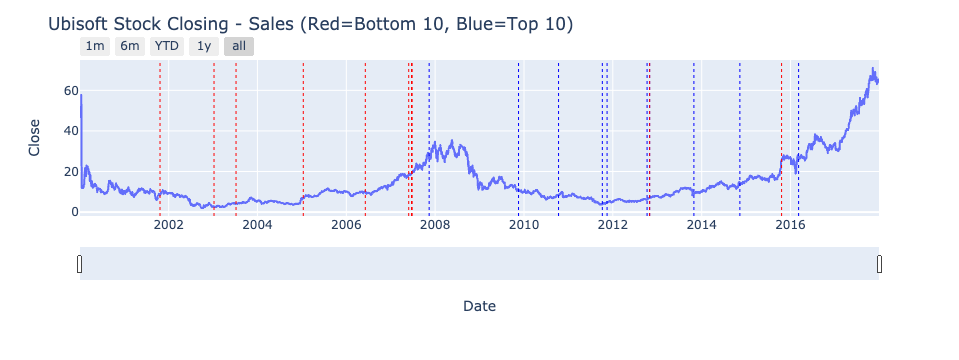

                               title release_date          console  \
150                     Just Dance 3   2011-10-07        Wii, X360   
19              Assassin's Creed III   2012-10-30        PS3, X360   
16               Assassin's Creed II   2009-11-17        PS3, X360   
13                  Assassin's Creed   2007-11-13        X360, PS3   
143                     Just Dance 2   2010-10-12              Wii   
152                     Just Dance 4   2012-10-09   Wii, X360, PS3   
34     Assassin's Creed: Revelations   2011-11-15        PS3, X360   
38           Assassin's Creed: Unity   2014-11-11    PS4, XOne, PC   
23   Assassin's Creed IV: Black Flag   2013-10-29  PS3, X360, WiiU   
322        Tom Clancy's The Division   2016-03-08    PS4, XOne, PC   

     total_sales  critic_score  
150        12.16     65.000000  
19         11.81     86.000000  
16         10.87     90.500000  
13         10.38     82.000000  
143         9.44     73.000000  
152         8.55     76.000000 

In [27]:
vg_df_series_sales = vg_df_series[vg_df_series['console'] != "PC"].sort_values(by="total_sales", ascending=False)
top10_vg_sales = vg_df_series_sales.head(10)
bot10_vg_sales = vg_df_series_sales.tail(10)


fig = go.Figure()

fig = px.line(stock, x="Date", y="Close")
# for col in cols:
#     fig.add_trace(go.Scatter(
#         x=stock['Date'],
#         y=stock['Close'],
# #         name=col
#     ))


for index, row in top10_vg_sales.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="blue",
            width=1,
            dash="dot",
        )
    )
    
for index, row in bot10_vg_sales.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="red",
            width=1,
            dash="dot"#,
 #           hover_name="Title"
        )
    )

#fig.update_traces(mode="markers+lines", hovertemplate=None)    
    
    
#     fig.add_annotation(
#         x=row['release_date'], 
#         y='critic_score',
#         text=row['title'],
#             showarrow=True,
#             arrowhead=4,
#             )

fig.update_layout(
    title=(f"{game_co} Stock Closing - Sales (Red=Bottom 10, Blue=Top 10)"),
)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


print(top10_vg_sales[['title', 'release_date', 'console', 'total_sales', 'critic_score']])
print(bot10_vg_sales[['title', 'release_date', 'console', 'total_sales', 'critic_score']])

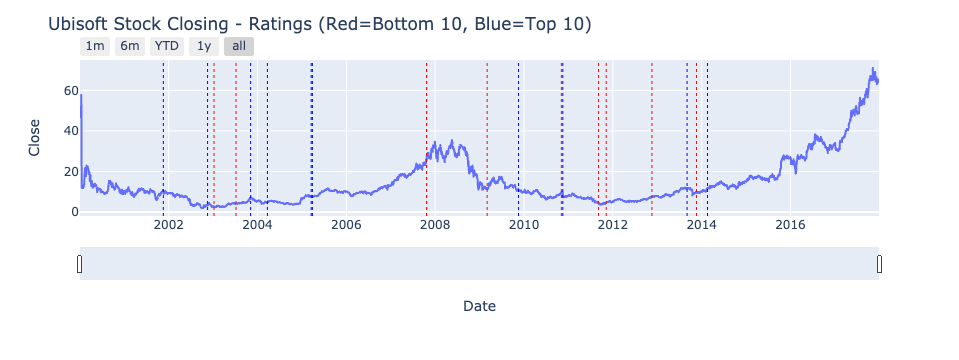

                                            title release_date  \
303                    Tom Clancy's Splinter Cell   2002-11-17   
318  Tom Clancy's Splinter Cell: Pandora Tomorrow   2004-03-23   
134                                IL-2 Sturmovik   2001-11-18   
32                  Assassin's Creed: Brotherhood   2010-11-16   
214                                Rayman Legends   2013-09-03   
309      Tom Clancy's Splinter Cell: Chaos Theory   2005-03-28   
215                                Rayman Legends   2014-02-18   
16                            Assassin's Creed II   2009-11-17   
243                             Silent Hunter III   2005-03-18   
193           Prince of Persia: The Sands of Time   2003-11-06   

                  console  total_sales  critic_score  
303                    XB         3.02         93.00  
318                    XB         1.48         92.00  
134                    PC         0.01         91.00  
32              X360, PS3         6.38         91.00 

In [28]:
vg_df_series_rated = vg_df_series.sort_values(by="critic_score", ascending=False)
top10_vg_rated = vg_df_series_rated.head(10)
bot10_vg_rated = vg_df_series_rated.tail(10)

fig = go.Figure()

fig = px.line(stock, x="Date", y="Close")
# for col in cols:
#     fig.add_trace(go.Scatter(
#         x=stock['Date'],
#         y=stock['Close'],
# #         name=col
#     ))


for index, row in top10_vg_rated.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="blue",
            width=1,
            dash="dot",
        )
    )
    
for index, row in bot10_vg_rated.dropna(subset=['title']).iterrows():
    fig.add_shape(
        type='line',
        x0=row['release_date'],
        y0=0,
        x1=row['release_date'],
        y1=1,
        yref='paper',
        line=dict(
            color="red",
            width=1,
            dash="dot"#,
 #           hover_name="Title"
        )
    )

#fig.update_traces(mode="markers+lines", hovertemplate=None)    
    
    
#     fig.add_annotation(
#         x=row['release_date'], 
#         y='critic_score',
#         text=row['title'],
#             showarrow=True,
#             arrowhead=4,
#             )
fig.update_layout(
    title=(f"{game_co} Stock Closing - Ratings (Red=Bottom 10, Blue=Top 10)"),
)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()


print(top10_vg_rated[['title', 'release_date', 'console', 'total_sales', 'critic_score']])
print(bot10_vg_rated[['title', 'release_date', 'console', 'total_sales', 'critic_score']])

In [ ]:
# pd.DataFrame(vg_df_series_85).to_csv(r'Dash/vg_df_series_85.csv')
# pd.DataFrame(vg_df_series_70).to_csv(r'Dash/vg_df_series_70.csv')